In [ ]:
My CardioGood Fitness Solution

**The team identified the following customer variables to study:**

Product: Product purchased - TM195, TM498, or TM798

Gender: Male or Female

Age: Age of the customer in years

Education: Education of the customer in years

MaritalStatus: Single or partnered

Income: Annual household income

Usage: The average number of times the customer plans to use the treadmill each week;

Miles: The average number of miles the customer expects to walk/run each week;

Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is excellent shape.


**Questions to explore**

What are the different types of variables in the data?

*   What is the distribution of different variables in the data?
*   Which product is more popular among males or females?
*   Is the product purchase affected by the marital status of the customer?
*   Is there a significant correlation among some of the variables?
*   What is the distribution of the average number of miles for each product?

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Mount Google Colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data from csv file
data = pd.read_csv('/content/drive/MyDrive/MIT - Data Sciences/Colab Notebooks/Week One - Python for Data Science/CardioGoodFitness.csv')

In [ ]:
# Make sure the data was imported into python
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Determine description of the data set
data.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
# Get dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Set the seaborn style and palette for all plots
sns.set(style="whitegrid")
sns.set_palette("Set2")

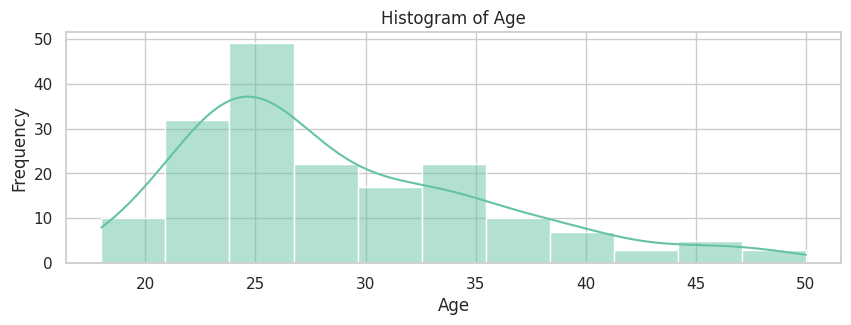

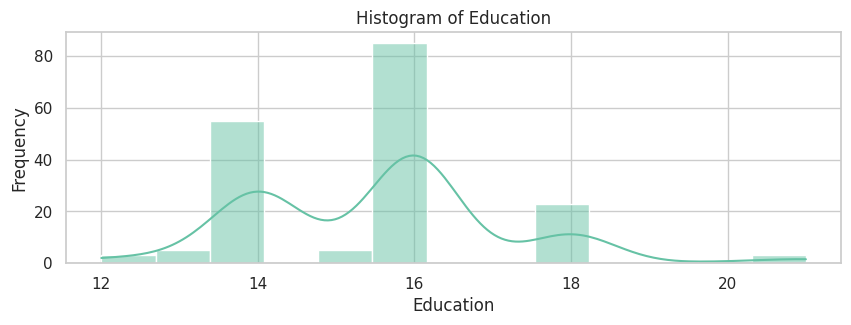

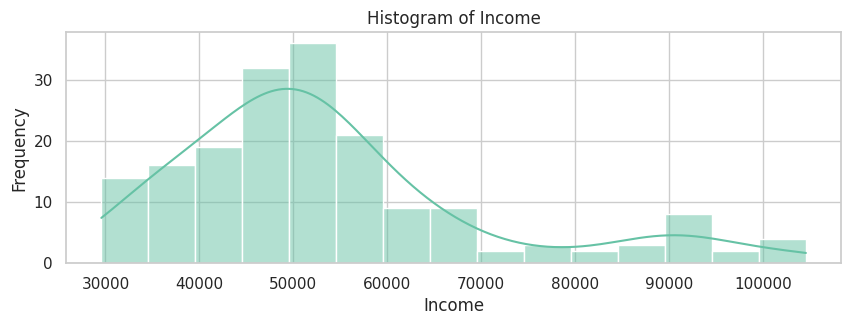

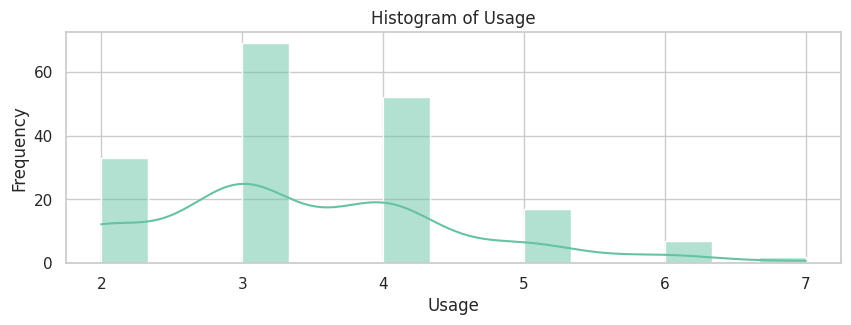

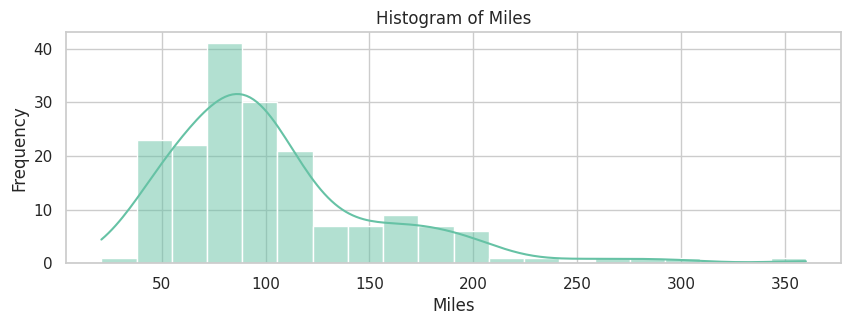

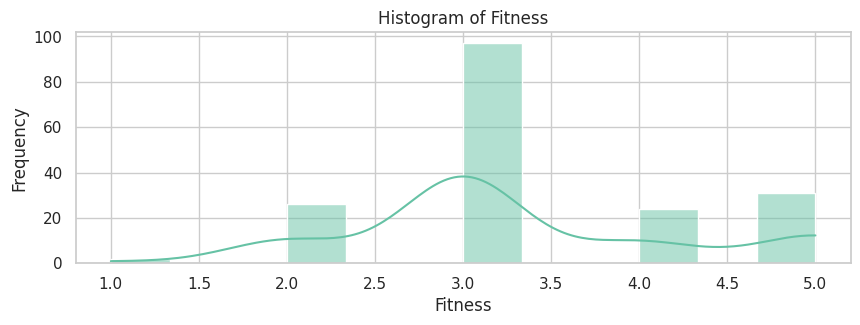

In [ ]:
# Plotting histograms for each column of interest to visually represent the distibution of variables in the data

columns_of_interest = ['Age', 'Education', 'Income', 'Usage', 'Miles', 'Fitness']

for column in columns_of_interest:
    plt.figure(figsize=(10, 3))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Determine popularity of product by gender
product_gender_counts = data.groupby(['Product', 'Gender']).size().unstack()
product_gender_counts

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


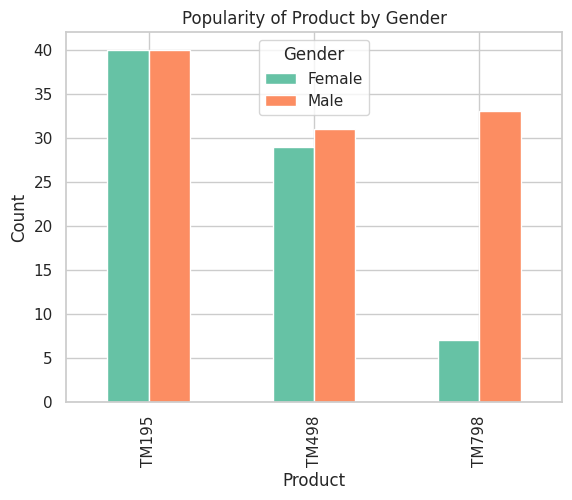

In [ ]:
# Plot product popularity by gender

product_gender_counts.plot(kind='bar')
plt.title('Popularity of Product by Gender')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

In [ ]:
# Determine product popularity by marital status
product_marital_counts = data.groupby(['Product', 'MaritalStatus']).size().unstack()
product_marital_counts

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


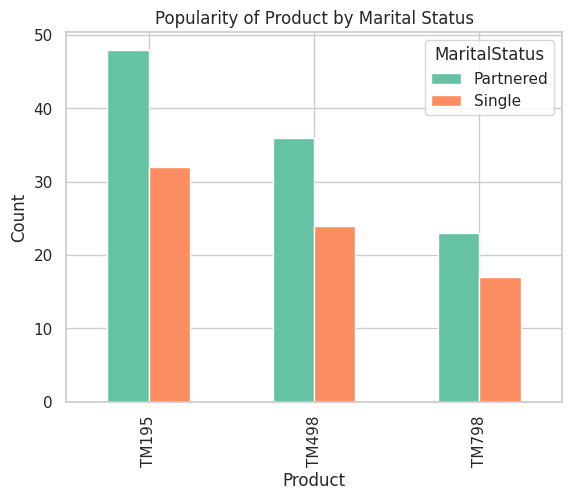

In [ ]:
# Plot popularity by marital status

product_marital_counts.plot(kind='bar')
plt.title('Popularity of Product by Marital Status')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

In [ ]:
# Determine if there is a significant correlation between data

# Select only the numeric columns for correlation matrix
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


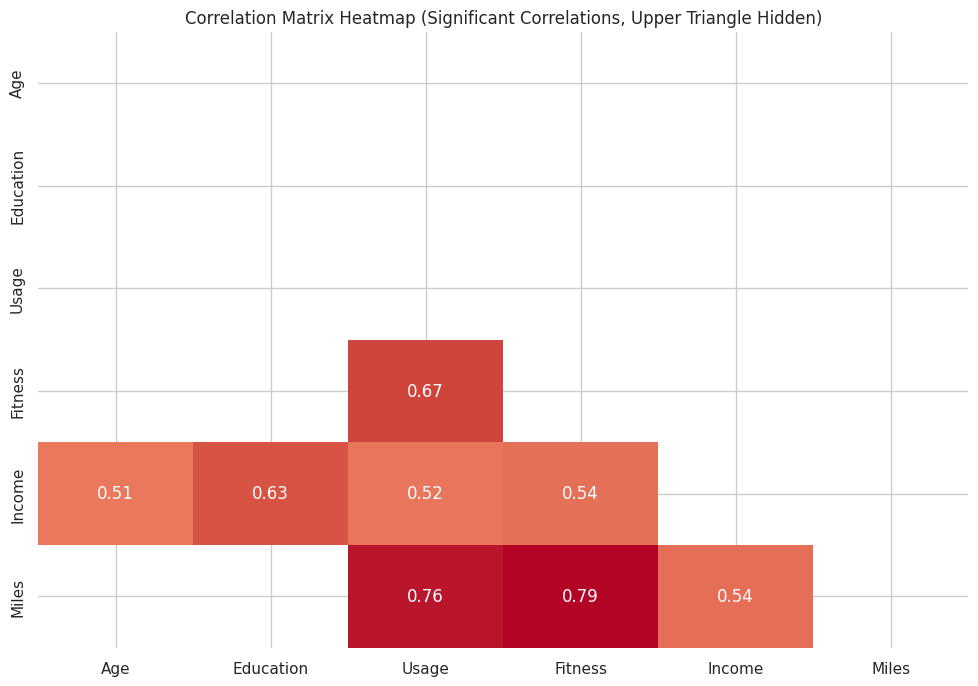

In [ ]:
# Determin any significat correlations between data elements

# Mask insignificant correlations (e.g., correlations with absolute value < 0.5)
threshold = 0.5
mask_significant = np.abs(correlation_matrix) < threshold

# Create a mask for the upper triangle
mask_upper_triangle = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Combine both masks
combined_mask = mask_significant | mask_upper_triangle

# Plotting the heatmap with masked insignificant correlations and hidden upper triangle
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=combined_mask, cbar=False)
plt.title('Correlation Matrix Heatmap (Significant Correlations, Upper Triangle Hidden)')
plt.show()

In [ ]:
# Determine the distribution of the average number of miles of use for each product

# Determine product popularity by usage in miles
product_avg_miles_counts = data.groupby(['Product', 'Miles']).size().unstack()
product_avg_miles_counts

Miles,21,38,42,47,53,56,64,66,74,75,...,170,180,188,200,212,240,260,280,300,360
Product,,,,,,,,,,,,,,,,,,,,,
TM195,NaN,3.0,NaN,9.0,NaN,6.0,NaN,10.0,NaN,10.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TM498,1.0,NaN,4.0,NaN,7.0,NaN,6.0,NaN,3.0,NaN,...,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
TM798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,NaN,6.0,NaN,1.0,1.0,1.0,1.0,1.0


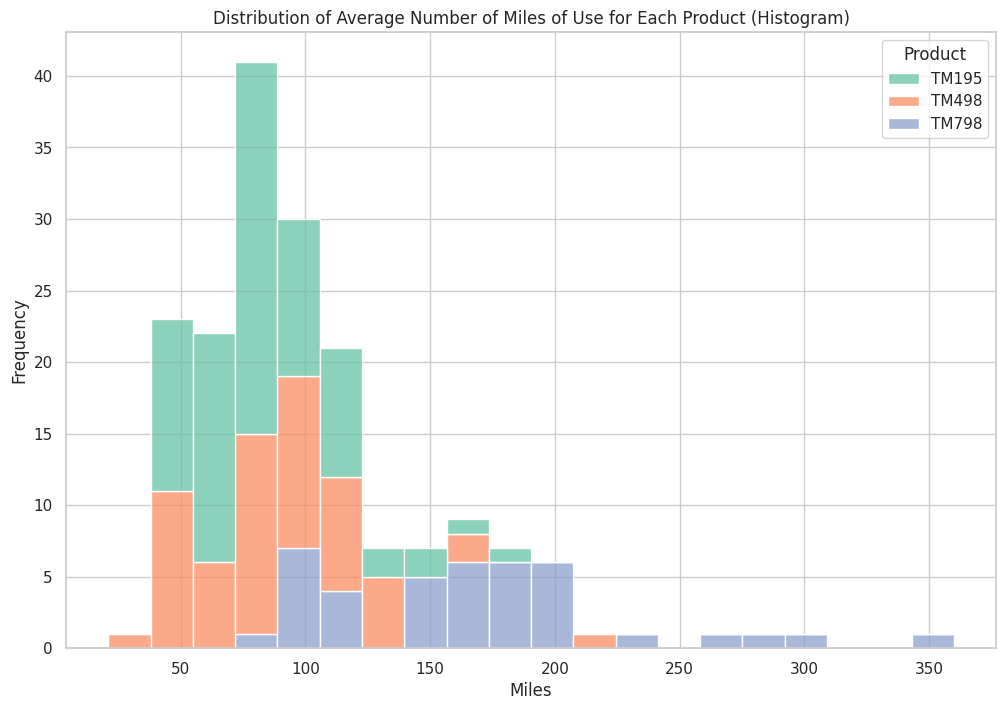

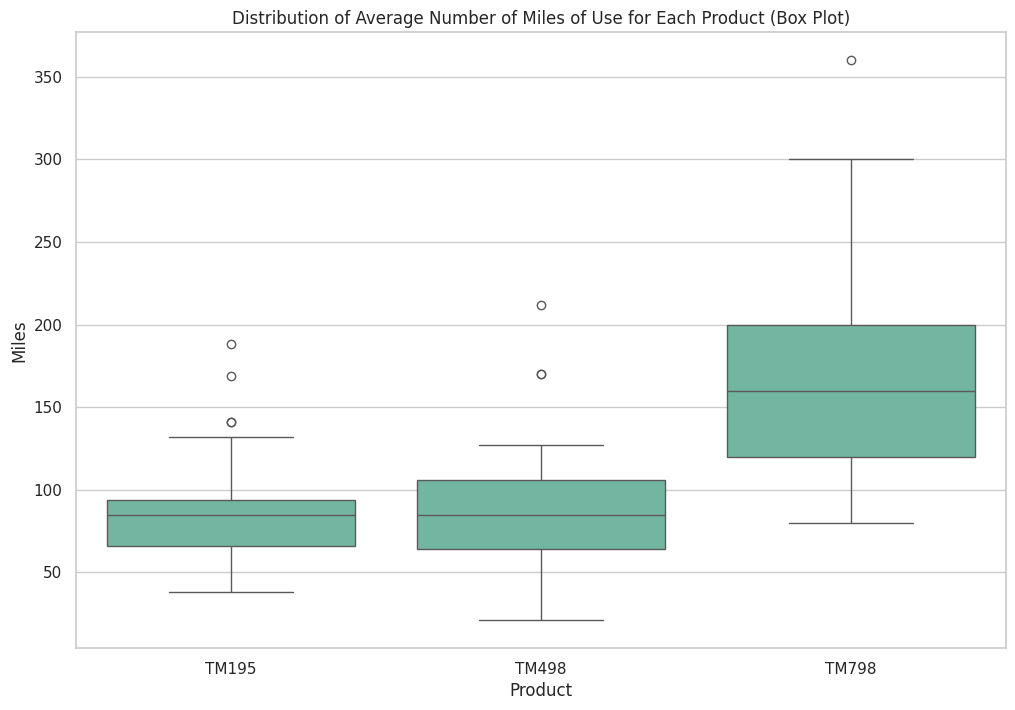

In [ ]:
# Plotting histograms for the distribution of miles for each product
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Miles', hue='Product', multiple='stack')
plt.title('Distribution of Average Number of Miles of Use for Each Product (Histogram)')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

# Plotting box plots for the distribution of miles for each product
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Product', y='Miles')
plt.title('Distribution of Average Number of Miles of Use for Each Product (Box Plot)')
plt.xlabel('Product')
plt.ylabel('Miles')
plt.show()